**Arbol de Expansión Mínimo: Algoritmo Kruskal**

MST aplicando el Algortimo Kruskal a partir de una lista de adyacencia ponderada.

In [47]:
import graphviz as gv

In [48]:
# Clase que representa y maneja al Grafo
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    #Agregar arista al Grafo
    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    # Funcion de busqueda Union Find
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    # Realiza UNION de "x" y "y"
    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        #Coloca la raiz del arbol mas pequeño bajo la raiz del arbol más grande
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1


    #  Aplicando del Algortimo Kruskal
    def kruskal_algo(self):
        result = [] # Resultado
        i, e, tot_weight = 0, 0, 0  #"i": indice usado para las aristas ordenadas. "e" usado para result[]
        self.graph = sorted(self.graph, key=lambda item: item[2]) #Ordena el Grafo por las Costos de las aristas, en orden creciente
        parent = []
        rank = []
        # Crea subconjuntos a partie de los Vertices V
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1: #Mientras el número de aristas a tomar es menor que V-1
            #Elegimos el borde más pequeño e incrementamos el índice para la próxima iteración
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            # Si incluir este borde no provoca un ciclo, inclúyalo en el resultado e incremente el índice del resultado para el borde siguiente
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        
        # Aristas que forman parte del MST
        for u, v, weight in result:
            tot_weight = tot_weight + weight
            print("%d - %d: %d" % (u, v, weight))

        print("Costo total del MST para el grafo: ", tot_weight)

        return result


Definición de una LA ponderada. Se lee del nodo 0: hacia nodo 2 existe un peso de 4, del nodo 0: hacia nodo 7 existe un peso de 8 y del nodo 0: hacia nodo 14 existe un peso de 3....

In [49]:
%%file 1.in
1|4 2|4
2|2 0|4
0|4 1|2 3|3 5|2 4|4
2|3 4|3
2|4 3|3
2|2 4|3

Overwriting 1.in


Funciones que permiten leer(readAdjl) y visualizar(adjlShow) una lista de adyacencia.

In [50]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

Visualizamos el grafo ponderado a partir de la lista de Adyacencia ponderada contenida en el archivo 1.in

 0: [(1, 4), (2, 4)]
 1: [(2, 2), (0, 4)]
 2: [(0, 4), (1, 2), (3, 3), (5, 2), (4, 4)]
 3: [(2, 3), (4, 3)]
 4: [(2, 4), (3, 3)]
 5: [(2, 2), (4, 3)]


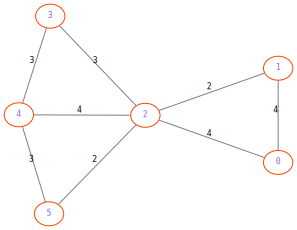

In [51]:
G, _ = readAdjl("1.in", weighted=True)
for i, edges in enumerate(G):
  print(f"{i:2}: {edges}")
adjlShow(G, weighted=True)

Otra forma de crear el grafo y sus aristas ponderadas (sin leer una lista de adyacencia de sde un archivo).

In [52]:
g = Graph(6)
g.add_edge(0, 1, 4)
g.add_edge(0, 2, 4)
g.add_edge(1, 2, 2)
g.add_edge(1, 0, 4)
g.add_edge(2, 0, 4)
g.add_edge(2, 1, 2)
g.add_edge(2, 3, 3)
g.add_edge(2, 5, 2)
g.add_edge(2, 4, 4)
g.add_edge(3, 2, 3)
g.add_edge(3, 4, 3)
g.add_edge(4, 2, 4)
g.add_edge(4, 3, 3)
g.add_edge(5, 2, 2)
g.add_edge(5, 4, 3)


Ejecutamos la funcion del Algoritmo Kruskal, **kruskal_algo()** a fin de obtener el costo total del mst para el grafo G.

In [54]:
#Algoritmo de Kruskal
resultado = g.kruskal_algo()


1 - 2: 2
2 - 5: 2
2 - 3: 3
3 - 4: 3
0 - 1: 4
Costo total del MST para el grafo:  14


Graficamos el MST:

resultado:  [[1, 2, 2], [2, 5, 2], [2, 3, 3], [3, 4, 3], [0, 1, 4]]



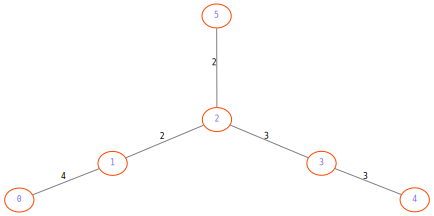

In [60]:
print("resultado: ", resultado)
print()

# Grafo MST
graph_mst = gv.Graph()

#Atributos del Grafo
graph_mst.graph_attr["layout"] = "sfdp"
graph_mst.edge_attr["color"] = "gray"
graph_mst.node_attr["color"] = "orangered"
graph_mst.node_attr["width"] = "0.1"
graph_mst.node_attr["height"] = "0.1"
graph_mst.node_attr["fontsize"] = "8"
graph_mst.node_attr["fontcolor"] = "mediumslateblue"
graph_mst.node_attr["fontname"] = "monospace"
graph_mst.edge_attr["fontsize"] = "8"
graph_mst.edge_attr["fontname"] = "monospace"

for u, v, weight in resultado:
  #print("%d - %d: %d" % (u, v, weight))
  graph_mst.edge(str(u), str(v), color = "gray", label = str(weight))
  #graph_mst.edge(str(u), str(v), str(weight))

graph_mst